In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import seaborn as sns

blues = ["#0d88e6", "#8ECDDD", "#22668D", "#42d4f4", ]
COLORS_20 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c',
             '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
             '#000075', '#808080', '#ffffff', '#000000']
semi_balck = '#4F6272'

In [2]:
def abs_percentage_error(A, F):
    abs_errors = [
        abs((a - f) / a)
        for a, f in zip(A, F)
    ]
    return np.mean(abs_errors), np.var(abs_errors)
def abs_percentage_error_by_batch(A, F):
    abs_errors = [
        abs((a-f)/a)
    for a, f in zip(A, F)
    ]
    jumps = list(range(0, len(abs_errors), 512)) + [len(abs_errors)]
    means = [
        np.mean(abs_errors[jumps[i]:jumps[i+1]])
        for i in range(len(jumps)-1)
    ]
    print(means)

    return np.mean(means), np.var(abs_errors)

In [3]:
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)

In [45]:
results_path = "/Volumes/noamaz/modularity/retina_xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
n_features = 6
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"retina_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/retina_xor_multi_arch/{res_folder}"

In [46]:
lgbm_folder_name = 'exp_2023-11-27-15-51-15_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results_with_preds"

In [47]:
num_features = []
feature_selection_res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    feature_selection_res = pd.concat([feature_selection_res, temp], ignore_index=True)
feature_selection_res = feature_selection_res.sort_values('num_features')

In [48]:
feature_selection_ind_res = pd.DataFrame()
all_preds = {}
for file_name in os.listdir(lgb_res_nn_path):
    if 'prediction_results.csv' not in file_name:
        continue
    model = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    mape, var = abs_percentage_error(model['test_label'], model['test_pred'])
    num_features = int(file_name.split('only_')[1].split('_features')[0])
    all_preds[num_features] = {'model': model, 'mape': mape, 'var': var}
    temp = pd.DataFrame.from_dict({
        'test mape ind': [mape],
        'test mape ind var': [var],
        'num_features': [num_features],
    },
    )
    feature_selection_ind_res = pd.concat([feature_selection_ind_res, temp], ignore_index=True)
feature_selection_res= pd.merge(feature_selection_res  ,feature_selection_ind_res, left_on='num_features',  right_on='num_features')

In [8]:
feature_selection_res.to_csv(f'{lgb_res_path}/{time_str}_all_exp_mape_prediction_results.csv')


In [49]:
feature_selection_res

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,test mape ind,test mape ind var
0,0,326,0.030160,0.028498,0.000036,0.000036,0.319866,0.345106,1,0.028835,0.000822
1,0,361,0.026886,0.025854,0.000033,0.000034,0.432193,0.431723,2,0.026067,0.000729
2,0,470,0.023989,0.023902,0.000030,0.000032,0.524125,0.498476,3,0.027471,0.000541
3,0,489,0.019967,0.019948,0.000026,0.000026,0.658397,0.653520,4,0.022500,0.000412
4,0,458,0.017820,0.018335,0.000023,0.000024,0.726385,0.704558,5,0.019184,0.000401
5,0,486,0.018217,0.017278,0.000023,0.000023,0.725371,0.735411,6,0.017311,0.000352
6,0,484,0.016739,0.016551,0.000021,0.000022,0.760907,0.751959,7,0.016977,0.000360
7,0,498,0.016325,0.016114,0.000021,0.000021,0.772750,0.768201,8,0.017150,0.000329
8,0,465,0.014446,0.014958,0.000018,0.000020,0.824509,0.804437,10,0.019548,0.000227
9,0,393,0.012128,0.012309,0.000015,0.000016,0.885483,0.871173,20,0.013159,0.000184


In [106]:
feature_selection_res['mape_ratio_min'] = feature_selection_res['test mape ind'].min() / feature_selection_res[
    'test mape ind']
feature_selection_res['mape_ratio_min_inv'] = feature_selection_res[
    'test mape ind'] / feature_selection_res['test mape ind'].min()
feature_selection_res['r2_ratio_max'] = feature_selection_res['best r2 test'] / feature_selection_res[
   'best r2 test'].max()

feature_selection_res['mape_reletive_cahnge'] = (feature_selection_res[
    'test mape ind'] -feature_selection_res['test mape ind'].min())/ feature_selection_res['test mape ind'].min()
feature_selection_res['r2_reletive_cahnge'] = (feature_selection_res['best r2 test'].max() - feature_selection_res[
    'best r2 test'] )/ feature_selection_res['best r2 test'].max()
feature_selection_res[
    ['mape_reletive_cahnge','r2_reletive_cahnge','mape_ratio_min','mape_ratio_min_inv', 'test mape ind', 'best r2 test',
     'r2_ratio_max', 'num_features']]

,mape_reletive_cahnge,r2_reletive_cahnge,mape_ratio_min,mape_ratio_min_inv,test mape ind,best r2 test,r2_ratio_max,num_features
0,1.213752,0.606323,0.451722,2.213752,0.028835,0.345106,0.393677,1
1,1.001220,0.507515,0.499695,2.001220,0.026067,0.431723,0.492485,2
2,1.109057,0.431366,0.474145,2.109057,0.027471,0.498476,0.568634,3
3,0.727395,0.254501,0.578906,1.727395,0.022500,0.653520,0.745499,4
4,0.472818,0.196280,0.678971,1.472818,0.019184,0.704558,0.803720,5
5,0.329038,0.161084,0.752424,1.329038,0.017311,0.735411,0.838916,6
6,0.303376,0.142208,0.767238,1.303376,0.016977,0.751959,0.857792,7
7,0.316647,0.123680,0.759505,1.316647,0.017150,0.768201,0.876320,8
8,0.500761,0.082344,0.666328,1.500761,0.019548,0.804437,0.917656,10
9,0.010240,0.006215,0.989864,1.010240,0.013159,0.871173,0.993785,20


In [114]:
feature_selection_res[feature_selection_res['num_features'].isin((6, 20, 30))][[
    'best mape train',
    'test mape ind',
    'mape_reletive_cahnge',
    'best r2 train',
    'best r2 test',
    'r2_reletive_cahnge',
    'num_features',
]].round(4)

,best mape train,test mape ind,mape_reletive_cahnge,best r2 train,best r2 test,r2_reletive_cahnge,num_features
5,0.0182,0.0173,0.3290,0.7254,0.7354,0.1611,6
9,0.0121,0.0132,0.0102,0.8855,0.8712,0.0062,20
10,0.0114,0.0130,0.0000,0.9019,0.8766,0.0000,30


In [107]:
feature_selection_res[feature_selection_res['num_features'].isin((6, 20, 72))][[
    'mape_ratio_min',
    'best mape test',
    'best mape train',
    'best r2 test',
    'best r2 train',
    'r2_ratio_max',
    'num_features',
]]

,mape_ratio_min,best mape test,best mape train,best r2 test,best r2 train,r2_ratio_max,num_features
5,0.752424,0.017278,0.018217,0.735411,0.725371,0.838916,6
9,0.989864,0.012309,0.012128,0.871173,0.885483,0.993785,20
15,0.810525,0.012349,0.010982,0.866869,0.905412,0.988875,72


In [ ]:
plt.figure(figsize=(7, 6), )
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=blues[1])
plt.plot(feature_selection_res['num_features'], feature_selection_res['best mape test'], label='test', c=blues[0])

plt.xlabel('number of features', fontsize=13)
plt.ylabel(f'Mean absolute percentage error', fontsize=13)
plt.legend()
plt.title(
    f"{task.capitalize()} - Performance of an DANN predicting networks’ mean performance as a function of the number of the best performing features used",
    wrap=True, fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [ ]:
import torch
from torchmetrics.regression import MeanAbsolutePercentageError
men_a = MeanAbsolutePercentageError()

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_39642/3535247847.py:53: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


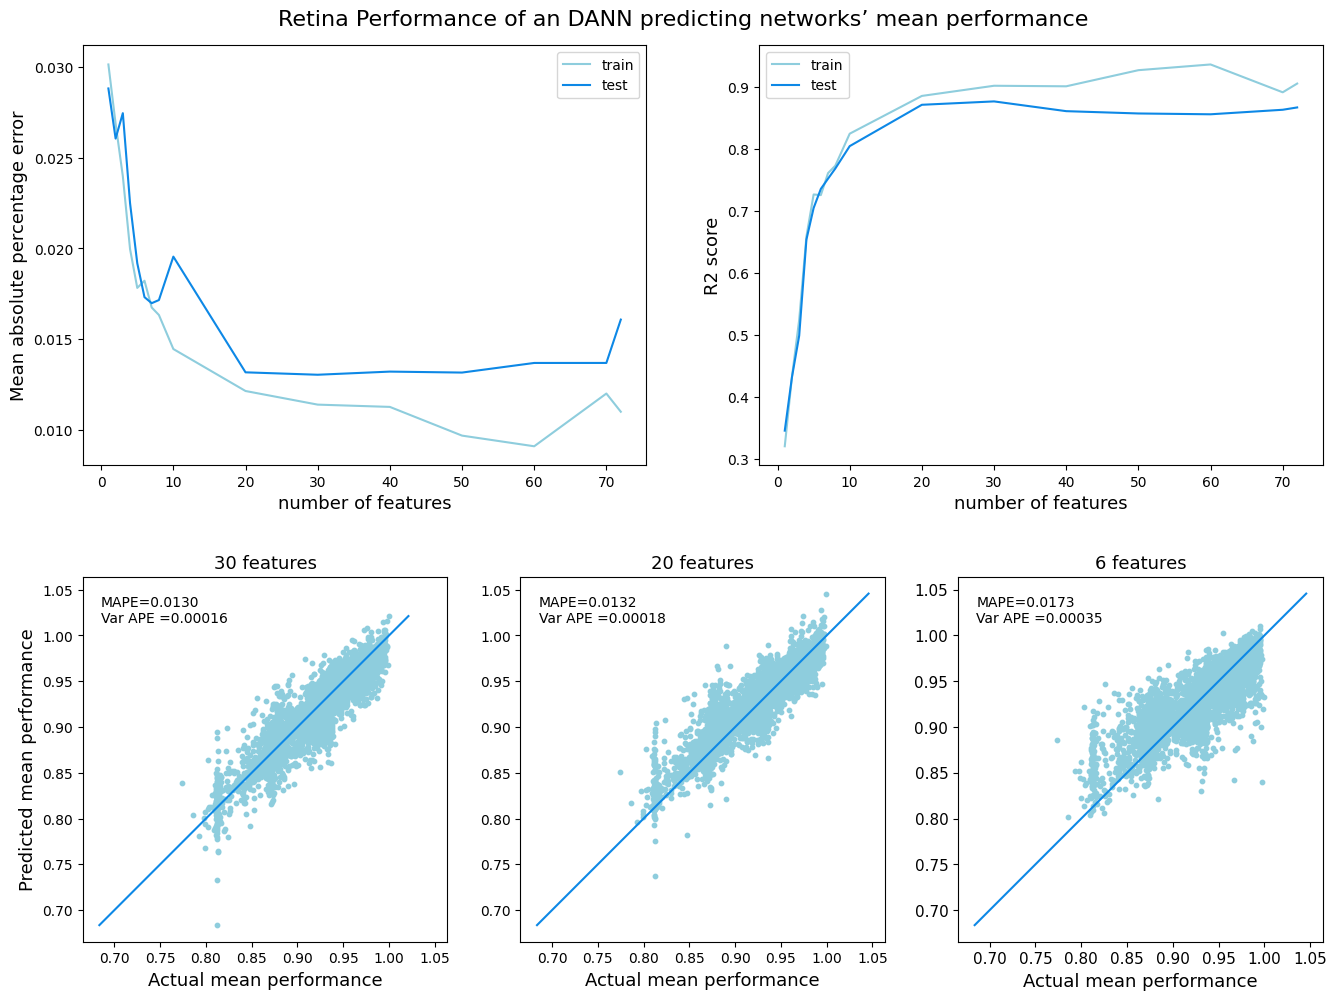

In [13]:
fetureas = [30, 20, 6]
stop =0
start=100
fig = plt.figure(figsize=(16, 12))
ax0 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)
ax1 = fig.add_subplot(234)
ax2 = fig.add_subplot(235, sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(236, sharex=ax1, sharey=ax1)

for ax, num_fet in zip((ax1, ax2, ax3), fetureas):
    model = all_preds[num_fet]['model']
    start_ = min(model['test_label'].min(), model['test_pred'].min())
    if start_ < start:
        start = start_
    stop_ = max(model['test_label'].max(), model['test_pred'].max())
    if stop_ > stop:
        stop = stop_
    ax.scatter(model['test_label'], model['test_pred'], s=10, c=blues[1])
    textstr = '\n'.join((
        r'MAPE=%.4f' % ( all_preds[num_fet]['mape']),
        r'Var APE =%.5f' % ( all_preds[num_fet]['var'])))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', )
    ax.set_box_aspect(1)
    ax.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=blues[0])
    ax.set_title(
        f"{num_fet} features",
        wrap=True, fontsize=13)
    ax.set_xlabel('Actual mean performance', fontsize=13)

ax1.set_ylabel('Predicted mean performance', fontsize=13)

plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
#plt.suptitle(f"{task.capitalize()} - DANN predicted performance vs. actual performance" ,wrap=True, fontsize=14)

ax0.plot(feature_selection_res['num_features'], feature_selection_res['best mape train'], label='train', c=blues[1])
ax0.plot(feature_selection_res['num_features'], feature_selection_res['test mape ind'], label='test', c=blues[0])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 train'], label='train', c=blues[1])
ax01.plot(feature_selection_res['num_features'], feature_selection_res['best r2 test'], label='test', c=blues[0])

ax0.set_xlabel('number of features', fontsize=13)
ax0.set_ylabel(f'Mean absolute percentage error', fontsize=13)
ax01.set_xlabel('number of features', fontsize=13)
ax01.set_ylabel(f'R2 score', fontsize=13)
ax0.legend()
ax01.legend()
plt.suptitle(
    f"{task.capitalize()} Performance of an DANN predicting networks’ mean performance",
    wrap=True, fontsize=16 , y=0.91)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [33]:
glob_inds = []
feature_selection_res_by_glob = pd.DataFrame()
for folder_name in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality"):
    if folder_name == 'with_inv':
        continue
    glob_ind = folder_name.split('glob_')[1].replace('_', '.')
    glob_inds.append(glob_ind)
    lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/by_globality/{folder_name}/teach_archs_regression_feature_selection_results"
    f_ = []
    for file_name in os.listdir(lgb_res_nn_path):
        if 'best.csv' not in file_name:
            continue
        temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
        num_features = int(file_name.split('only_')[1].split('_features')[0])
        if num_features in f_:
            continue
        f_.append(num_features)
        temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
        temp['glob_ind'] = glob_ind
        feature_selection_res_by_glob = pd.concat([feature_selection_res_by_glob, temp], ignore_index=True)
feature_selection_res_by_glob = feature_selection_res_by_glob.sort_values(['glob_ind', 'num_features'])

In [39]:
feature_selection_res_by_glob[feature_selection_res_by_glob['num_features'] == 9]

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features,glob_ind
33,0,99,0.022222,0.020896,0.000027,0.000027,0.613316,0.642976,9,0
20,0,336,0.017142,0.018787,0.000022,0.000025,0.742248,0.688562,9,0.5
19,0,484,0.020928,0.020963,0.000027,0.000027,0.624610,0.620359,9,0.75
2,0,404,0.021242,0.020471,0.000027,0.000027,0.624625,0.639897,9,1


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_39642/1694521414.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


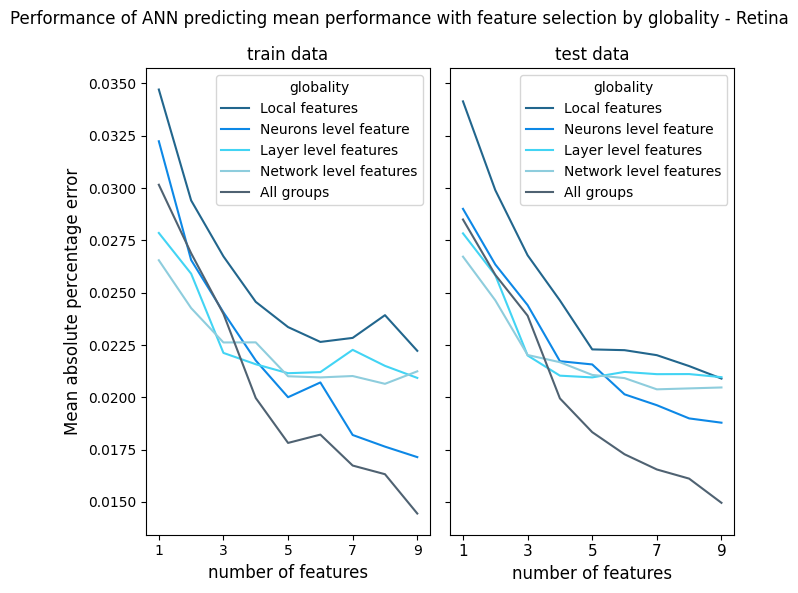

In [55]:
glob_levels =  {
    1: "Network level features",
    0.75: "Layer level features",
    0.5: "Neurons level feature",
    0: "Local features"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 9]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 10]
ax1.plot(range(1,10), small_all_fetaures_selcetion['best mape train'],
         label="All groups", c=semi_balck)
ax2.plot(range(1, 10), small_all_fetaures_selcetion['best mape test'],label="All groups",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
ax1.set_xticks(range(1,10, 2))
ax2.set_xticks(range(1,10, 2))

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [41]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 9]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 9]['best mape test'].item(), 3))

Local features 0.021
Neurons level feature 0.019
Layer level features 0.021
Network level features 0.02


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_39642/1958468354.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


ValueError: can only convert an array of size 1 to a Python scalar

In [37]:
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] == 1]
    try:
        print(glob_levels[float(ind)], round(res_per_glob['best mape test'].item(), 3))
    except:
        continue
print('all', round(feature_selection_res[feature_selection_res['num_features'] == 1]['best mape test'].item(), 3))

Local features 0.034
Neurons level feature 0.029
Layer level features 0.028
Network level features 0.027
all 0.028


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_39642/1173731828.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][


In [ ]:
glob_levels = {
    1: "entire network level",
    0.75: "layer level",
    0.5: "multi neuron level",
    0: "local"
}
sorted_blues = ["#22668D", "#0d88e6", "#42d4f4", "#8ECDDD", ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 6), sharex='all', sharey='all')
for i, ind in enumerate(glob_inds[::-1]):
    res_per_glob = feature_selection_res_by_glob[feature_selection_res_by_glob['glob_ind'] == ind][
        feature_selection_res_by_glob['num_features'] <= 40]
    ax1.plot(res_per_glob['num_features'], res_per_glob['best mape train'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
    ax2.plot(res_per_glob['num_features'], res_per_glob['best mape test'], label=f"{glob_levels[float(ind)]}",
             c=sorted_blues[i])
small_all_fetaures_selcetion = feature_selection_res[feature_selection_res['num_features'] <= 40]
ax1.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape train'],
         label="all_data", c=semi_balck)
ax2.plot(small_all_fetaures_selcetion['num_features'], small_all_fetaures_selcetion['best mape test'], label="all_data",
         c=semi_balck)
ax1.set_xlabel('number of features', fontsize=12)
ax1.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax2.set_xlabel('number of features', fontsize=12)
#ax1.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])
#ax2.set_xticks(np.arange(small_all_fetaures_selcetion.shape[0]+1)[::2])

#ax2.set_ylabel(f'Mean absolute percentage error', fontsize=12)
ax1.legend(title='globality')
ax2.legend(title='globality')
ax1.set_title('train data')
ax2.set_title('test data')
plt.suptitle(
    f"Performance of ANN predicting mean performance with feature selection by globality - {task.capitalize()}",
    wrap=True, fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape_long.png")
plt.show()

In [ ]:
selected_features_res = pd.read_csv(f"{lgb_res_path}/6_feature_values.csv").drop("Unnamed: 0", axis=1)

In [ ]:
selected_feature_names = list(selected_features_res.columns)[:-1]

In [ ]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 3, figsize=(12, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = selected_features_res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, selected_features_res['label'], c=blues[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 40:
        name = f"{f_name.replace('_', ' ')[:22]}\n{f_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    axs[i, j].set_xlabel(f"{name.capitalize()}", fontsize=18)
    #axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
axs[1, 0].set_ylabel(f"Mean performance", fontsize=18)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=18)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist.png")
